In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Zad

Proszę pobrać dowolny duży obraz. Otwórzmy go w pythonie w skali szarości i przekonwertujmy do numpy array.

Załóżmy że jego rozdzielczość to $m$ na $n$. Potraktujmy go jako $m$ wektorów $n$ wymiarowych.

Zredukujmy dane za pomocą SVD z $n$ wymiarów do $k$ wymiarów (proszę rozważyć różne $k$). 

Zrekonstruujmy teraz obraz z wymiaru $k$ do oryginalnego wymiaru i zobaczmy jak wyglądają.



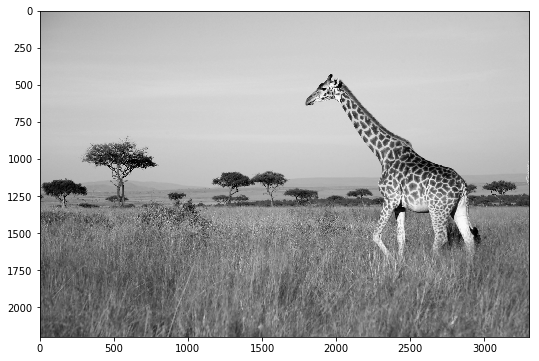

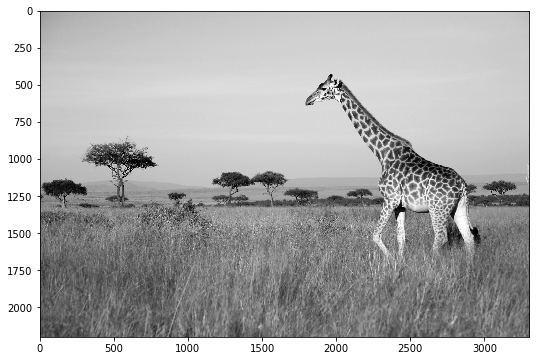

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

img = Image.open('datasets/1.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
#imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [7]:
imgmat = imgmat/255
imgmat

array([[0.60392157, 0.60392157, 0.60392157, ..., 0.7254902 , 0.72156863,
        0.71764706],
       [0.60784314, 0.60392157, 0.60392157, ..., 0.72156863, 0.72156863,
        0.71764706],
       [0.60784314, 0.60784314, 0.60392157, ..., 0.72156863, 0.72156863,
        0.71764706],
       ...,
       [0.19607843, 0.19215686, 0.18431373, ..., 0.37254902, 0.35686275,
        0.34509804],
       [0.18823529, 0.18039216, 0.18039216, ..., 0.37254902, 0.35294118,
        0.34117647],
       [0.18431373, 0.17647059, 0.17647059, ..., 0.38039216, 0.36078431,
        0.34901961]])

# Zad 
Prosze wykonać rozkład SVD i narysować wykres przedstawiający najważniejsze komponenty.

In [9]:
from sklearn.decomposition import TruncatedSVD as svd

U, s, V = np.linalg.svd(imgmat, full_matrices=True)

print("U:\n", U)
S = np.zeros((imgmat.shape[0], imgmat.shape[1]))
# populate Sigma with n x n diagonal matrix
S[:imgmat.shape[0], :imgmat.shape[0]] = np.diag(s)
print("S\n", S)
print("V^T:\n", V)

U:
 [[-0.02478613 -0.00453709 -0.00011097 ...  0.01129002 -0.00281575
  -0.00102735]
 [-0.02479576 -0.00452175 -0.00014267 ...  0.0020405   0.00486582
  -0.00569477]
 [-0.02480638 -0.00455436 -0.00016308 ... -0.01823027 -0.00389066
  -0.00430005]
 ...
 [-0.01350439  0.00211336  0.00347284 ...  0.00451257 -0.00084933
  -0.00960731]
 [-0.01349423  0.00199881  0.00351714 ... -0.00164611  0.00142805
   0.01872012]
 [-0.01349911  0.00199746  0.00359137 ...  0.00033401 -0.00223545
  -0.01001689]]
S
 [[1729.51220183    0.            0.         ...    0.
     0.            0.        ]
 [   0.          137.95177382    0.         ...    0.
     0.            0.        ]
 [   0.            0.          103.35299932 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.          

In [10]:
svd_model = svd(n_components=3)
X_new = svd_model.fit_transform(imgmat)

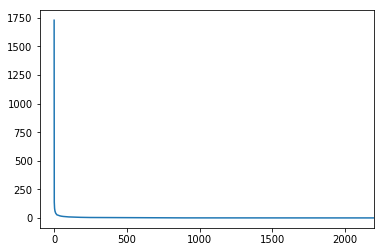

In [14]:
df_new=pd.DataFrame(X_new)
plt.plot(s)
plt.xlim([-100,2200])
plt.show()

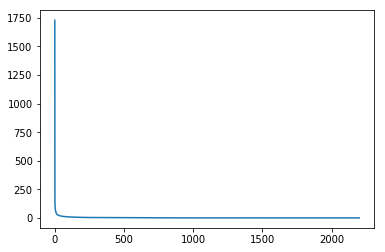

# Zad
Proszę narysować zdjęcio z 10 komponentami.

# Zad
Proszę narysowac wyniki dla 

$$
k = 1, ..., 100
$$

In [ ]:
for i in range(200):
    k = i
    im2 = np.dot(np.dot(U[:,:k], np.diag(s[:k])), V[:k,:])
    im2[im2<0] = 0
    im2[im2>1] = 1
    plt.figure(figsize=(9,6))
    plt.imshow()

# Zad
Wykonaj alogiczne zadania na danych w formacie RGB.

Traktujemy kanały RGB niezależnie i wykonujemy na nich procedurę osobno.


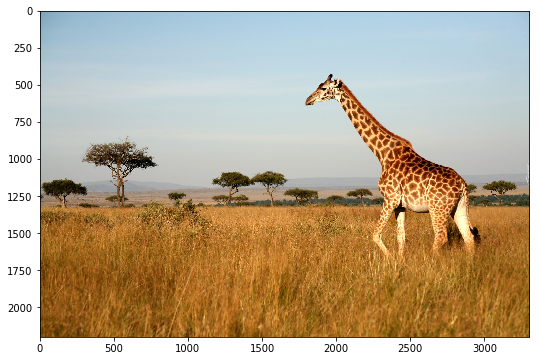

In [10]:
import PIL.Image as Image
im = Image.open("datasets/1.jpg")
plt.figure(figsize=(9,6))
plt.imshow(im)
plt.show()

In [11]:
im = np.array(im)/255
im
#im.nbytes

array([[[0.47843137, 0.64705882, 0.71372549],
        [0.47843137, 0.64705882, 0.71372549],
        [0.47843137, 0.64705882, 0.71372549],
        ...,
        [0.63921569, 0.74901961, 0.84313725],
        [0.63529412, 0.74509804, 0.83921569],
        [0.63137255, 0.74117647, 0.83529412]],

       [[0.48235294, 0.65098039, 0.71764706],
        [0.47843137, 0.64705882, 0.71372549],
        [0.47843137, 0.64705882, 0.71372549],
        ...,
        [0.63529412, 0.74509804, 0.83921569],
        [0.63529412, 0.74509804, 0.83921569],
        [0.63137255, 0.74117647, 0.83529412]],

       [[0.48235294, 0.65098039, 0.71764706],
        [0.48235294, 0.65098039, 0.71764706],
        [0.48235294, 0.64313725, 0.72156863],
        ...,
        [0.62745098, 0.74901961, 0.83137255],
        [0.62745098, 0.74901961, 0.83137255],
        [0.62352941, 0.74509804, 0.82745098]],

       ...,

       [[0.29411765, 0.18431373, 0.        ],
        [0.29803922, 0.17647059, 0.        ],
        [0.29803922, 0

In [12]:
im_r = im[:,:,0]
im_g = im[:,:,1]
im_b = im[:,:,2]

In [ ]:
U_r, s_r, V_r = np.linalg.svd(im_r)
U_g, s_g, V_g = np.linalg.svd(im_g)
U_b, s_b, V_b = np.linalg.svd(im_b)

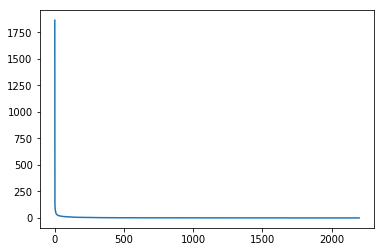

# Zad
Proszę narysować zdjęcio z 

* 5 komponentami
* 10 komponentami

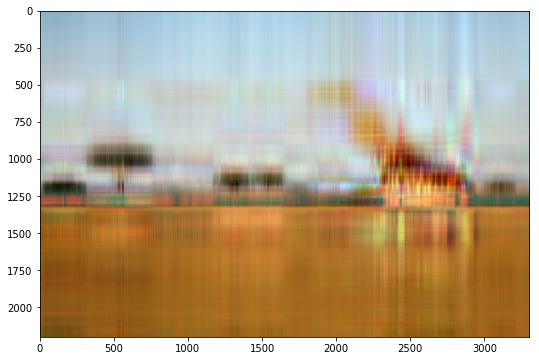

In [17]:
k = 5

im2_r = np.dot(np.dot(U_r[:,:k],np.diag(s_r[:k])),V_r[:k,:])
im2_g = np.dot(np.dot(U_g[:,:k],np.diag(s_g[:k])),V_g[:k,:])
im2_b = np.dot(np.dot(U_b[:,:k],np.diag(s_b[:k])),V_b[:k,:])

im2 = np.zeros_like(im)
im2[:,:,0] = im2_r
im2[:,:,1] = im2_g
im2[:,:,2] = im2_b
im2[im2<0] = 0
im2[im2>1] = 1

plt.figure(figsize=(9,6))
plt.imshow(im2)
plt.show()

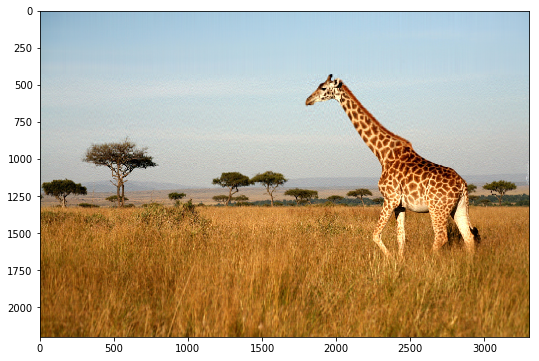

In [18]:
k = 150

im2_r = np.dot(np.dot(U_r[:,:k],np.diag(s_r[:k])),V_r[:k,:])
im2_g = np.dot(np.dot(U_g[:,:k],np.diag(s_g[:k])),V_g[:k,:])
im2_b = np.dot(np.dot(U_b[:,:k],np.diag(s_b[:k])),V_b[:k,:])

im2 = np.zeros_like(im)
im2[:,:,0] = im2_r
im2[:,:,1] = im2_g
im2[:,:,2] = im2_b
im2[im2<0] = 0
im2[im2>1] = 1

plt.figure(figsize=(9,6))
plt.imshow(im2)
plt.show()

## Wniosek: zamiast pamiętać całego zdjęcia możemy pamiętać rozkład SVD

In [50]:
im.nbytes

174240000

In [51]:
3*np.sum([x.nbytes for x in 
        [U_r[:,:k],s_r[:k],V_r[:k,:]]])

19803600

# Zad

Wykonaj analogiczne zadania za pomocą wbudowanej funkcji:

```python
from sklearn.decomposition import TruncatedSVD
```

z parametrem 

* **n_components = 150**

In [1]:
from sklearn.decomposition import TruncatedSVD



# Zad

* Proszę teraz potraktować obrazek jako zbiór kostek 8 na 8 - czyli dostajemy wektor 64 wymiarowy. 
* Dokonać tej samej procedury kompresji. Które podejście daje mniejszy błąd od oryginału używając tej samej ilości komponentów (dowolna odlegość po pikselach) - dlaczego?

# Zad

Jak wygląda zdjęcie z 5 współrzędnymi

# Zad
Proszę narysowac wyniki dla 

$$
k = 1, ..., 100
$$